# 11번가

In [1]:
import pandas as pd
import os
import openpyxl

In [2]:
excel_file = 'C:/Users/HAEUNSEO/easy_python/BDA/내부공모전/2305_11번가장바구니data1.xlsx'
sheet_names = ['23051주차11번가', '23052주차_11번가', '230511번가3주차','23054주차11번가','23055주차11번가']

In [3]:
# 각 시트를 데이터프레임으로 읽어 리스트에 저장
dfs = [pd.read_excel(excel_file, sheet_name=sheet_name) for sheet_name in sheet_names]

In [4]:
# concat을 사용하여 데이터프레임들을 합치기
merged_df = pd.concat(dfs)
merged_df

,자사주문번호,거래처,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품명,...,상품유형,상품타입,매출액,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분
0,40787430508088827,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,11.0,비비고/총각김치2.3KG,...,단일 상품,일반,26900,비비고/총각김치2.3KG(6입)_PGGNH/냉장,1,1,0,0,택배배송,냉장
1,40787430508088827,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,21.0,비비고 포기배추김치 더풍부한맛 3.3kg,...,단일 상품,일반,33800,비비고/포기배추더풍부한맛3.3KG(2입)/냉장,1,1,0,0,택배배송,냉장
2,40787430508088820,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,11.0,비비고/열무를 넣은 총각김치 1.3Kg,...,단일 상품,일반,14900,비비고/열무를 넣은 총각김치 1.3KG/냉장,1,1,0,0,택배배송,냉장
3,40787430508088820,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,21.0,[공용_마켓전략]비비고 묵은지 1.5kg,...,단일 상품,일반,16900,비비고/묵은지 1.5KG(4입)/냉장,1,1,0,0,택배배송,냉장
4,40787430506052632,외부몰_직거래_11번가(신),20230506,N,20230508,배송 완료,-,2023-05-07 06:12:05,11.0,삼호 얇은포 부산어묵 1kg,...,단일 상품,일반,35120,B)삼호/얇은포 부산어묵 1KG/냉동,4,4,0,0,택배배송,냉동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,40787430528428649,외부몰_직거래_11번가(신),20230528,N,20230530,배송 완료,NaN,2023-05-30 16:27:01,NaN,[복합_마켓전략]비비고 노릇하게구운고등어구이60gx5 + 순살삼치구이60gx5(냉동),...,복합 상품,일반,19450,비비고/순살삼치구이 60G_HS/냉동,5,5,0,0,택배배송,냉동
136,40787430528428537,외부몰_직거래_11번가(신),20230528,N,20230530,배송 완료,NaN,2023-05-28 13:33:03,NaN,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),...,복합 상품,일반,4960,햇반/소프트밀 버섯야채죽 280G/상온,2,2,0,0,택배배송,상온
137,40787430528428537,외부몰_직거래_11번가(신),20230528,N,20230530,배송 완료,NaN,2023-05-28 13:33:03,NaN,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),...,복합 상품,일반,4960,햇반/소프트밀 소고기죽 280G/상온,2,2,0,0,택배배송,상온
138,40787430528428537,외부몰_직거래_11번가(신),20230528,N,20230530,배송 완료,NaN,2023-05-28 13:33:03,NaN,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),...,복합 상품,일반,4960,햇반/소프트밀 전복버섯죽 280G/상온,2,2,0,0,택배배송,상온


# 1. 주문일 => 매출액 비교

In [5]:
merged_df.sort_values(by='주문일',ascending=True)

,자사주문번호,거래처,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품명,...,상품유형,상품타입,매출액,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분
277,40787430501956144,외부몰_직거래_11번가(신),20230501,N,20230502,배송 완료,-,2023-05-03 06:42:17,11.0,비비고/파김치800G,...,단일 상품,일반,39600,비비고/파김치800G_PGGNH/냉장,2,2,0,0,택배배송,냉장
228,40787430502983361,외부몰_직거래_11번가(신),20230501,N,20230507,주문취소,취소완료,2023-05-07 05:48:00,12.0,[11번가]비비고 감자탕 460g 3개,...,묶음 상품,일반,0,비비고/감자탕 460G_18입/상온,3,0,3,0,택배배송,상온
229,40787430502983361,외부몰_직거래_11번가(신),20230501,N,20230507,배송 완료,-,2023-05-07 05:48:00,21.0,[11번가] 비비고 된장찌개 460gx3개,...,묶음 상품,일반,14500,비비고/된장찌개 460G(16입)/상온,3,3,0,0,택배배송,상온
230,40787430502983361,외부몰_직거래_11번가(신),20230501,N,20230507,배송 완료,-,2023-05-07 05:48:00,22.0,[11번가] 비비고 소고기 미역국 500gX3봉,...,묶음 상품,일반,14500,비비고/미역국 500G_18입/상온,3,3,0,0,택배배송,상온
231,40787430502983361,외부몰_직거래_11번가(신),20230501,N,20230507,배송 완료,-,2023-05-07 05:48:00,31.0,[11번가] 비비고 소고기 미역국 500gX3봉,...,묶음 상품,일반,15076,비비고/미역국 500G_18입/상온,3,3,0,0,택배배송,상온
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,40787430531504084,외부몰_직거래_11번가(신),20230531,N,20230601,배송 완료,NaN,2023-06-01 06:54:03,NaN,다담 정통된장찌개 양념 140gX3,...,묶음 상품,일반,5438,다담/정통된장찌개양념 140G/24입/냉장,3,3,0,0,택배배송,냉장
31,40787430531495428,외부몰_직거래_11번가(신),20230531,N,20230601,배송 완료,NaN,2023-05-31 15:33:06,NaN,[공용_마켓전략]즐거운동행 풍국면 들기름막국수 266g 2개,...,묶음 상품,일반,36000,즐거운동행/풍국면 들기름막국수 266G/상온,8,8,0,0,택배배송,상온
30,40787430531495440,외부몰_직거래_11번가(신),20230531,N,20230601,배송 완료,NaN,2023-05-31 15:33:06,NaN,[11번가]바질&로즈마리드레싱 235g,...,단일 상품,일반,21400,씨제이/바질로즈마리드레싱235G/12입/냉장,5,5,0,0,택배배송,냉장
15,40787430531506826,외부몰_직거래_11번가(신),20230531,N,20230602,배송 완료,NaN,2023-06-01 06:54:03,NaN,비비고 순살삼치구이 60gX2,...,묶음 상품,일반,10238,비비고/순살삼치구이 60G/냉장,2,2,0,0,택배배송,냉장


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 139
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자사주문번호   1548 non-null   int64  
 1   거래처      1548 non-null   object 
 2   주문일      1548 non-null   int64  
 3   사은품여부    1548 non-null   object 
 4   출고예정일    1548 non-null   int64  
 5   주문/배송상태  1548 non-null   object 
 6   클레임 상태   1408 non-null   object 
 7   운송장등록일자  1517 non-null   object 
 8   상품순번     1408 non-null   float64
 9   상품명      1548 non-null   object 
 10  상품수량     1548 non-null   int64  
 11  덤상품수량    1548 non-null   int64  
 12  상품유형     1548 non-null   object 
 13  상품타입     1548 non-null   object 
 14  매출액      1548 non-null   int64  
 15  자재명      1548 non-null   object 
 16  초기자재수량   1548 non-null   int64  
 17  주문수량     1548 non-null   int64  
 18  취소수량     1548 non-null   int64  
 19  반품수량     1548 non-null   int64  
 20  배송유형     1548 non-null   object 
 21  마감구분     1548 n

In [7]:
merged_df.isna().sum()

자사주문번호       0
거래처          0
주문일          0
사은품여부        0
출고예정일        0
주문/배송상태      0
클레임 상태     140
운송장등록일자     31
상품순번       140
상품명          0
상품수량         0
덤상품수량        0
상품유형         0
상품타입         0
매출액          0
자재명          0
초기자재수량       0
주문수량         0
취소수량         0
반품수량         0
배송유형         0
마감구분         0
dtype: int64

### 요일별 어떤 상품이 가장 잘 나가는지 
(주문일=> 요일처리해서 상품명별 매출액 비교)

In [8]:
from datetime import datetime

In [9]:
# '주문일'이 int형이므로 datetime으로 변환
merged_df['주문일'] = pd.to_datetime(merged_df['주문일'], format='%Y%m%d')
merged_df

,자사주문번호,거래처,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품명,...,상품유형,상품타입,매출액,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분
0,40787430508088827,외부몰_직거래_11번가(신),2023-05-06,N,20230510,배송 완료,-,2023-05-09 06:03:23,11.0,비비고/총각김치2.3KG,...,단일 상품,일반,26900,비비고/총각김치2.3KG(6입)_PGGNH/냉장,1,1,0,0,택배배송,냉장
1,40787430508088827,외부몰_직거래_11번가(신),2023-05-06,N,20230510,배송 완료,-,2023-05-09 06:03:23,21.0,비비고 포기배추김치 더풍부한맛 3.3kg,...,단일 상품,일반,33800,비비고/포기배추더풍부한맛3.3KG(2입)/냉장,1,1,0,0,택배배송,냉장
2,40787430508088820,외부몰_직거래_11번가(신),2023-05-06,N,20230510,배송 완료,-,2023-05-09 06:03:23,11.0,비비고/열무를 넣은 총각김치 1.3Kg,...,단일 상품,일반,14900,비비고/열무를 넣은 총각김치 1.3KG/냉장,1,1,0,0,택배배송,냉장
3,40787430508088820,외부몰_직거래_11번가(신),2023-05-06,N,20230510,배송 완료,-,2023-05-09 06:03:23,21.0,[공용_마켓전략]비비고 묵은지 1.5kg,...,단일 상품,일반,16900,비비고/묵은지 1.5KG(4입)/냉장,1,1,0,0,택배배송,냉장
4,40787430506052632,외부몰_직거래_11번가(신),2023-05-06,N,20230508,배송 완료,-,2023-05-07 06:12:05,11.0,삼호 얇은포 부산어묵 1kg,...,단일 상품,일반,35120,B)삼호/얇은포 부산어묵 1KG/냉동,4,4,0,0,택배배송,냉동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,40787430528428649,외부몰_직거래_11번가(신),2023-05-28,N,20230530,배송 완료,NaN,2023-05-30 16:27:01,NaN,[복합_마켓전략]비비고 노릇하게구운고등어구이60gx5 + 순살삼치구이60gx5(냉동),...,복합 상품,일반,19450,비비고/순살삼치구이 60G_HS/냉동,5,5,0,0,택배배송,냉동
136,40787430528428537,외부몰_직거래_11번가(신),2023-05-28,N,20230530,배송 완료,NaN,2023-05-28 13:33:03,NaN,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),...,복합 상품,일반,4960,햇반/소프트밀 버섯야채죽 280G/상온,2,2,0,0,택배배송,상온
137,40787430528428537,외부몰_직거래_11번가(신),2023-05-28,N,20230530,배송 완료,NaN,2023-05-28 13:33:03,NaN,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),...,복합 상품,일반,4960,햇반/소프트밀 소고기죽 280G/상온,2,2,0,0,택배배송,상온
138,40787430528428537,외부몰_직거래_11번가(신),2023-05-28,N,20230530,배송 완료,NaN,2023-05-28 13:33:03,NaN,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),...,복합 상품,일반,4960,햇반/소프트밀 전복버섯죽 280G/상온,2,2,0,0,택배배송,상온


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 139
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   자사주문번호   1548 non-null   int64         
 1   거래처      1548 non-null   object        
 2   주문일      1548 non-null   datetime64[ns]
 3   사은품여부    1548 non-null   object        
 4   출고예정일    1548 non-null   int64         
 5   주문/배송상태  1548 non-null   object        
 6   클레임 상태   1408 non-null   object        
 7   운송장등록일자  1517 non-null   object        
 8   상품순번     1408 non-null   float64       
 9   상품명      1548 non-null   object        
 10  상품수량     1548 non-null   int64         
 11  덤상품수량    1548 non-null   int64         
 12  상품유형     1548 non-null   object        
 13  상품타입     1548 non-null   object        
 14  매출액      1548 non-null   int64         
 15  자재명      1548 non-null   object        
 16  초기자재수량   1548 non-null   int64         
 17  주문수량     1548 non-null   int64    

In [11]:
# 요일에 대한 정보 추출
merged_df['Day_of_Week'] = merged_df['주문일'].dt.day_name()
merged_df

,자사주문번호,거래처,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품명,...,상품타입,매출액,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분,Day_of_Week
0,40787430508088827,외부몰_직거래_11번가(신),2023-05-06,N,20230510,배송 완료,-,2023-05-09 06:03:23,11.0,비비고/총각김치2.3KG,...,일반,26900,비비고/총각김치2.3KG(6입)_PGGNH/냉장,1,1,0,0,택배배송,냉장,Saturday
1,40787430508088827,외부몰_직거래_11번가(신),2023-05-06,N,20230510,배송 완료,-,2023-05-09 06:03:23,21.0,비비고 포기배추김치 더풍부한맛 3.3kg,...,일반,33800,비비고/포기배추더풍부한맛3.3KG(2입)/냉장,1,1,0,0,택배배송,냉장,Saturday
2,40787430508088820,외부몰_직거래_11번가(신),2023-05-06,N,20230510,배송 완료,-,2023-05-09 06:03:23,11.0,비비고/열무를 넣은 총각김치 1.3Kg,...,일반,14900,비비고/열무를 넣은 총각김치 1.3KG/냉장,1,1,0,0,택배배송,냉장,Saturday
3,40787430508088820,외부몰_직거래_11번가(신),2023-05-06,N,20230510,배송 완료,-,2023-05-09 06:03:23,21.0,[공용_마켓전략]비비고 묵은지 1.5kg,...,일반,16900,비비고/묵은지 1.5KG(4입)/냉장,1,1,0,0,택배배송,냉장,Saturday
4,40787430506052632,외부몰_직거래_11번가(신),2023-05-06,N,20230508,배송 완료,-,2023-05-07 06:12:05,11.0,삼호 얇은포 부산어묵 1kg,...,일반,35120,B)삼호/얇은포 부산어묵 1KG/냉동,4,4,0,0,택배배송,냉동,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,40787430528428649,외부몰_직거래_11번가(신),2023-05-28,N,20230530,배송 완료,NaN,2023-05-30 16:27:01,NaN,[복합_마켓전략]비비고 노릇하게구운고등어구이60gx5 + 순살삼치구이60gx5(냉동),...,일반,19450,비비고/순살삼치구이 60G_HS/냉동,5,5,0,0,택배배송,냉동,Sunday
136,40787430528428537,외부몰_직거래_11번가(신),2023-05-28,N,20230530,배송 완료,NaN,2023-05-28 13:33:03,NaN,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),...,일반,4960,햇반/소프트밀 버섯야채죽 280G/상온,2,2,0,0,택배배송,상온,Sunday
137,40787430528428537,외부몰_직거래_11번가(신),2023-05-28,N,20230530,배송 완료,NaN,2023-05-28 13:33:03,NaN,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),...,일반,4960,햇반/소프트밀 소고기죽 280G/상온,2,2,0,0,택배배송,상온,Sunday
138,40787430528428537,외부몰_직거래_11번가(신),2023-05-28,N,20230530,배송 완료,NaN,2023-05-28 13:33:03,NaN,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),...,일반,4960,햇반/소프트밀 전복버섯죽 280G/상온,2,2,0,0,택배배송,상온,Sunday


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# 요일별 상품 구매 횟수를 세는 DataFrame 생성
cnt = merged_df.groupby(['Day_of_Week','상품명']).size().reset_index(name='cnt')

In [14]:
# 요일별 '가장 많이 구매'하는 상품 추출
most_each_day = cnt.loc[cnt.groupby('Day_of_Week')['cnt'].idxmax()]
most_each_day

,Day_of_Week,상품명,cnt
39,Friday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),48
134,Monday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),18
214,Saturday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),6
290,Sunday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),15
391,Thursday,다담 정통된장찌개 양념 140gX3,41
483,Tuesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),30
590,Wednesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),12


In [15]:
# 요일 순서를 정의 (월요일부터 일요일까지의 순서)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [16]:
# 요일별로 데이터 정렬
most_each_day['Day_of_Week'] = pd.Categorical(most_each_day['Day_of_Week'], categories=weekday_order, ordered=True)
df_sorted = most_each_day.sort_values(by='Day_of_Week')
df_sorted

,Day_of_Week,상품명,cnt
134,Monday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),18
483,Tuesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),30
590,Wednesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),12
391,Thursday,다담 정통된장찌개 양념 140gX3,41
39,Friday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),48
214,Saturday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),6
290,Sunday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),15


### 11번가 마켓전략이였던 *주먹밥* 상품이 대체적으로 많이 팔렸음

<Axes: xlabel='Day_of_Week'>

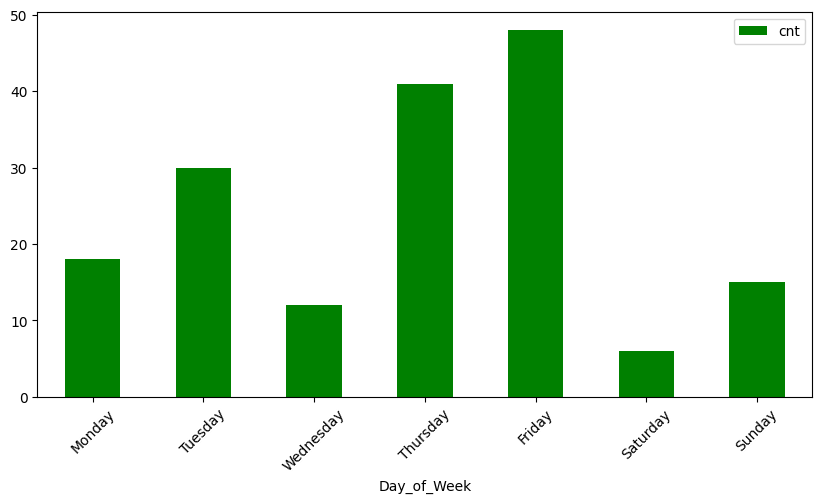

In [17]:
df_sorted.plot(kind='bar', x='Day_of_Week',y='cnt',color='green',rot=45,figsize=(10,5))

##### 두번째로 많이 구매한 상품은?

In [18]:
# 각 요일별로 구매 횟수를 기준으로 내림차순 정렬
sorted_day_p_cnt = cnt.sort_values(by=['Day_of_Week', 'cnt'], ascending=[True, False])
sorted_day_p_cnt

,Day_of_Week,상품명,cnt
39,Friday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),48
44,Friday,다담 정통된장찌개 양념 140gX3,7
32,Friday,[복합_마켓전략]CJ 이탈리안세트(파스타2+피자2+폭찹스테이크2+맥앤치즈2),6
4,Friday,[11번가] 다담 순두부찌개양념 140gX4개,4
34,Friday,[복합_마켓전략][본사직영]시원 아삭한 비비고 열무김치 1.5kg+열무물김치 900gx2,4
...,...,...,...
609,Wednesday,비비고/총각김치2.3KG,1
610,Wednesday,쁘띠첼 포도 90gx6ea,1
615,Wednesday,하선정 까나리액젓 800g,1
616,Wednesday,하선정 다진마늘150g,1


In [19]:
# 두번째로 많이 구매한 상품
second_most_each_day = sorted_day_p_cnt.groupby('Day_of_Week').nth(1)
second_most_each_day

,상품명,cnt
Day_of_Week,,
Friday,다담 정통된장찌개 양념 140gX3,7
Monday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),15
Saturday,[11번가] 비비고 고등어구이 60Gx2개,4
Sunday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),12
Thursday,[11번가] 다담 순두부찌개양념 140gX4개,30
Tuesday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),15
Wednesday,다담 정통된장찌개 양념 140gX3,12


In [20]:
# Day_of_Week -> 칼럼으로 변환
second_most_each_day = second_most_each_day.reset_index()
second_most_each_day

,Day_of_Week,상품명,cnt
0,Friday,다담 정통된장찌개 양념 140gX3,7
1,Monday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),15
2,Saturday,[11번가] 비비고 고등어구이 60Gx2개,4
3,Sunday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),12
4,Thursday,[11번가] 다담 순두부찌개양념 140gX4개,30
5,Tuesday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),15
6,Wednesday,다담 정통된장찌개 양념 140gX3,12


In [21]:
# 요일별로 데이터 정렬
second_most_each_day['Day_of_Week'] = pd.Categorical(second_most_each_day['Day_of_Week'], categories=weekday_order, ordered=True)
df_second_sorted = second_most_each_day.sort_values(by='Day_of_Week')
df_second_sorted

,Day_of_Week,상품명,cnt
1,Monday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),15
5,Tuesday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),15
6,Wednesday,다담 정통된장찌개 양념 140gX3,12
4,Thursday,[11번가] 다담 순두부찌개양념 140gX4개,30
0,Friday,다담 정통된장찌개 양념 140gX3,7
2,Saturday,[11번가] 비비고 고등어구이 60Gx2개,4
3,Sunday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),12


- 마찬가지로 주먹밥과 찌개 양념장이 많이 팔린 것을 볼 수 있음

### <span style='background-color: #fff5b1; color: #008000'>가장 많이 구매한 상품 매출액은 어떻게 될까?</span>

In [22]:
# 요일과 'Product' 열을 기준으로 그룹화하여 각 요일별, 제품별 총 매출액 계산
day_product_sales = merged_df.groupby(['Day_of_Week', '상품명'])['매출액'].sum().reset_index()
day_product_sales

,Day_of_Week,상품명,매출액
0,Friday,[11번가] 고메 핫도그 크리스피 480g,29900
1,Friday,[11번가] 다담 냉이 된장찌개 양념 140GX4,6955
2,Friday,[11번가] 다담 냉이된장찌개양념 140gX3개,15440
3,Friday,[11번가] 다담 바지락 순두부찌개 양념 140GX3개입,4925
4,Friday,[11번가] 다담 순두부찌개양념 140gX4개,27888
...,...,...,...
614,Wednesday,특설렁탕700G X2팩 +특양지곰탕700G X2팩,30000
615,Wednesday,하선정 까나리액젓 800g,65250
616,Wednesday,하선정 다진마늘150g,32400
617,Wednesday,하얀설탕15kg,109900


In [23]:
day_product_sales.query('상품명=="[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림)"')

,Day_of_Week,상품명,매출액
39,Friday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),305100
134,Monday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),135600
289,Sunday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),67800
379,Thursday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),135600
483,Tuesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),169500
590,Wednesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),67800


In [24]:
# 각 요일별로 가장 많이 구매한 제품의 매출액을 구함
idx = day_product_sales.groupby(['Day_of_Week'])['매출액'].idxmax()
most_product_sales = day_product_sales.loc[idx]

most_product_sales

,Day_of_Week,상품명,매출액
53,Friday,오천년의 신비 명품천일염(굵은입자) 10kg,413160
149,Monday,비비고 BASIC 포기배추김치 10kg(직택배),219600
214,Saturday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),101700
288,Sunday,[복합_마켓전략]에어프라이어 칼집 군밤 톡톡까먹어밤 500GX3,228000
422,Thursday,오천년의 신비 명품천일염(굵은입자) 10kg,241010
497,Tuesday,백설 빵가루 1kg,202400
598,Wednesday,비비고 BASIC 포기배추김치 10kg(직택배),349300


- 매출액과 가장 많이 팔린 상품의 상관이 없다????????
- 상품을 많이 구매하지 않더라도 1개 당 가격이 비싸면 n개 구매했을 경우 
- 많이 구매한 상품보다 가격이 높을 수 있음!

In [25]:
# 요일과 '상품명' 열을 기준으로 그룹화
# 각 요일별, 제품별 총 매출액과 상품 갯수 계산

day_product_sales = merged_df.groupby(['Day_of_Week', '상품명'])['매출액'].agg(['sum', 'count']).reset_index()
day_product_sales

,Day_of_Week,상품명,sum,count
0,Friday,[11번가] 고메 핫도그 크리스피 480g,29900,3
1,Friday,[11번가] 다담 냉이 된장찌개 양념 140GX4,6955,1
2,Friday,[11번가] 다담 냉이된장찌개양념 140gX3개,15440,3
3,Friday,[11번가] 다담 바지락 순두부찌개 양념 140GX3개입,4925,1
4,Friday,[11번가] 다담 순두부찌개양념 140gX4개,27888,4
...,...,...,...,...
614,Wednesday,특설렁탕700G X2팩 +특양지곰탕700G X2팩,30000,2
615,Wednesday,하선정 까나리액젓 800g,65250,1
616,Wednesday,하선정 다진마늘150g,32400,1
617,Wednesday,하얀설탕15kg,109900,2


In [26]:
# 요일별로 가장 많은 상품 갯수와 
# 매출액을 가진 상품 추출
idx = day_product_sales.groupby('Day_of_Week')['count'].idxmax()
most_product_sales = day_product_sales.loc[idx]

most_product_sales

,Day_of_Week,상품명,sum,count
39,Friday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),305100,48
134,Monday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),135600,18
214,Saturday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),101700,6
290,Sunday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),135600,15
391,Thursday,다담 정통된장찌개 양념 140gX3,198612,41
483,Tuesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),169500,30
590,Wednesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),67800,12


In [27]:
# sum -> 매출액 컬럼명 변경
most_product_sales.rename(columns={'sum': '매출액'}, inplace=True)
most_product_sales

,Day_of_Week,상품명,매출액,count
39,Friday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),305100,48
134,Monday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),135600,18
214,Saturday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),101700,6
290,Sunday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),135600,15
391,Thursday,다담 정통된장찌개 양념 140gX3,198612,41
483,Tuesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),169500,30
590,Wednesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),67800,12


### 요일 별 매출액 비교하기

In [28]:
# 각 요일별 매출액 합산
daily_sales = merged_df.groupby('Day_of_Week')['매출액'].sum()
daily_sales

Day_of_Week
Friday       2135420
Monday       4780940
Saturday     1418640
Sunday       2295940
Thursday     3891730
Tuesday      3199430
Wednesday    3717670
Name: 매출액, dtype: int64

In [29]:
daily_sales = daily_sales.reset_index()
daily_sales

,Day_of_Week,매출액
0,Friday,2135420
1,Monday,4780940
2,Saturday,1418640
3,Sunday,2295940
4,Thursday,3891730
5,Tuesday,3199430
6,Wednesday,3717670


In [30]:
# 요일별로 데이터 정렬
daily_sales['Day_of_Week'] = pd.Categorical(daily_sales['Day_of_Week'], categories=weekday_order, ordered=True)
daily_sorted = daily_sales.sort_values(by='Day_of_Week')
daily_sorted

,Day_of_Week,매출액
1,Monday,4780940
5,Tuesday,3199430
6,Wednesday,3717670
4,Thursday,3891730
0,Friday,2135420
2,Saturday,1418640
3,Sunday,2295940


In [31]:
#시각화를 위한 한글 폰트 설정
plt.rc('font', family= 'Malgun Gothic')

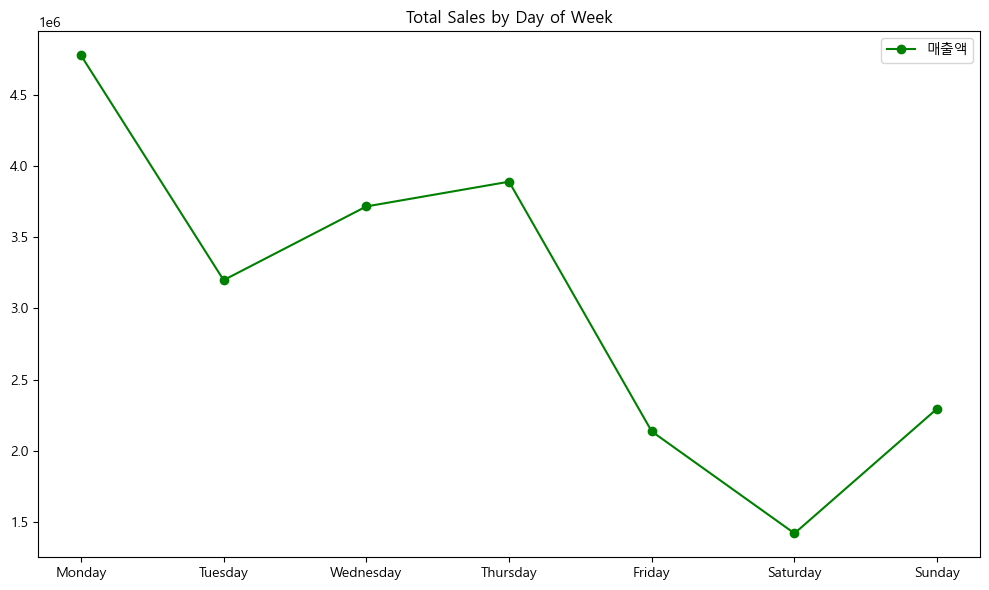

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sorted['Day_of_Week'], daily_sorted['매출액'], marker='o',color='green', label='매출액')
plt.title('Total Sales by Day of Week')

plt.legend()
plt.tight_layout()
plt.show()

### 요일 별 판매개수

In [40]:
# 각 요일별 판매개수
daily_cnt = merged_df.groupby('Day_of_Week')['매출액'].count()
daily_cnt

Day_of_Week
Friday       146
Monday       318
Saturday      87
Sunday       151
Thursday     386
Tuesday      241
Wednesday    219
Name: 매출액, dtype: int64

In [41]:
daily_cnt = daily_cnt.reset_index()
daily_cnt

,Day_of_Week,매출액
0,Friday,146
1,Monday,318
2,Saturday,87
3,Sunday,151
4,Thursday,386
5,Tuesday,241
6,Wednesday,219


### 최종

In [33]:
merge_df = pd.merge(most_product_sales,daily_sales, on='Day_of_Week', how='inner')
merge_df

,Day_of_Week,상품명,매출액_x,count,매출액_y
0,Friday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),305100,48,2135420
1,Monday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),135600,18,4780940
2,Saturday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),101700,6,1418640
3,Sunday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),135600,15,2295940
4,Thursday,다담 정통된장찌개 양념 140gX3,198612,41,3891730
5,Tuesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),169500,30,3199430
6,Wednesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),67800,12,3717670


In [34]:
# 요일별로 데이터 정렬
merge_df['Day_of_Week'] = pd.Categorical(merge_df['Day_of_Week'], categories=weekday_order, ordered=True)
merge_sorted = merge_df.sort_values(by='Day_of_Week')
merge_sorted

,Day_of_Week,상품명,매출액_x,count,매출액_y
1,Monday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),135600,18,4780940
5,Tuesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),169500,30,3199430
6,Wednesday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),67800,12,3717670
4,Thursday,다담 정통된장찌개 양념 140gX3,198612,41,3891730
0,Friday,[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림),305100,48,2135420
2,Saturday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),101700,6,1418640
3,Sunday,[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2),135600,15,2295940


요일 별 매출액 - 가장 많이 구매한 상품 매출액

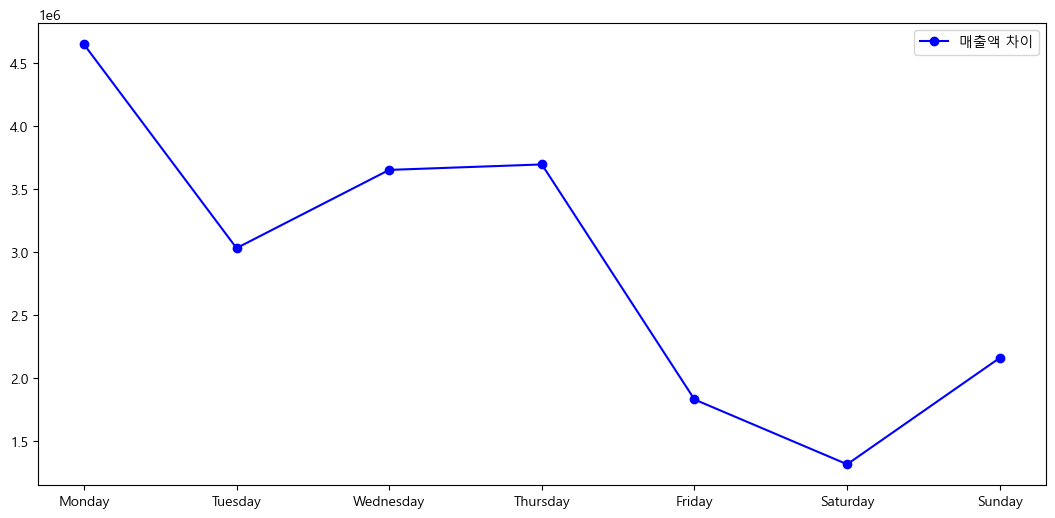

In [35]:
# 매출액의 차이 계산
merge_sorted['Sales_Difference'] = merge_sorted['매출액_y'] - merge_sorted['매출액_x']


# 그래프 그리기
plt.figure(figsize=(13, 6))
plt.plot(merge_sorted['Day_of_Week'], merge_sorted['Sales_Difference'], marker='o', color='b', label='매출액 차이')
plt.legend()
plt.show()


# 2. 사은품여부

In [36]:
merged_df.isna().sum()

자사주문번호           0
거래처              0
주문일              0
사은품여부            0
출고예정일            0
주문/배송상태          0
클레임 상태         140
운송장등록일자         31
상품순번           140
상품명              0
상품수량             0
덤상품수량            0
상품유형             0
상품타입             0
매출액              0
자재명              0
초기자재수량           0
주문수량             0
취소수량             0
반품수량             0
배송유형             0
마감구분             0
Day_of_Week      0
dtype: int64

In [37]:
merged_df.query("사은품여부=='Y'")

,자사주문번호,거래처,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품명,...,상품타입,매출액,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분,Day_of_Week


### 11번가 5월은 *사은품여부* 없음